In [1]:
# import the dependence
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv("C:/Users/Suvendu Khuntia/Downloads/Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# check the shape of the dataset
df.shape

(400, 9)

In [5]:
# check any null value 
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

In [7]:
# check duplicate's value
df.duplicated().sum()

0

In [8]:
# drop the serial columns
df = df.drop(columns='Serial No.', axis=1)

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()

In [12]:
# split the feature and target
x = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [13]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [14]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

In [15]:
# spliting into the dataset into training & testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [16]:
print(x.shape, x_train.shape, x_test.shape)

(400, 7) (320, 7) (80, 7)


In [17]:
# Use MinMaxScaler for neural networks
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [20]:
x_train_scaled

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [21]:
x_test_scaled

array([[0.11363636, 0.36      , 0.5       , 0.57142857, 0.71428571,
        0.29752066, 1.        ],
       [0.34090909, 0.28      , 0.5       , 0.85714286, 0.71428571,
        0.51239669, 1.        ],
       [1.        , 0.76      , 1.        , 0.71428571, 0.71428571,
        0.90909091, 1.        ],
       [0.65909091, 0.52      , 0.75      , 0.85714286, 0.71428571,
        0.68595041, 1.        ],
       [0.11363636, 0.08      , 0.25      , 0.42857143, 0.42857143,
        0.19834711, 1.        ],
       [1.        , 0.8       , 1.        , 0.85714286, 0.85714286,
        0.84710744, 1.        ],
       [0.02272727, 0.04      , 0.25      , 0.28571429, 0.        ,
        0.20247934, 0.        ],
       [0.15909091, 0.16      , 0.5       , 0.14285714, 0.28571429,
        0.10743802, 0.        ],
       [0.36363636, 0.4       , 0.25      , 0.14285714, 0.28571429,
        0.4338843 , 0.        ],
       [0.61363636, 0.72      , 0.5       , 0.71428571, 0.42857143,
        0.79338843, 1. 

In [22]:
import tensorflow
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [28]:
model = Sequential()

In [29]:
# adda layers
model.add(Dense(7, activation='relu', input_dim = 7))
model.add(Dense(1, activation='linear'))

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
# compile the model 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['Accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)
# in this ANN build for understand don't focous on accuracy score 

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - Accuracy: 0.0000e+00 - loss: 0.6243 - val_Accuracy: 0.0000e+00 - val_loss: 0.6561
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Accuracy: 0.0000e+00 - loss: 0.4294 - val_Accuracy: 0.0000e+00 - val_loss: 0.4725
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Accuracy: 0.0000e+00 - loss: 0.3248 - val_Accuracy: 0.0000e+00 - val_loss: 0.3275
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - Accuracy: 0.0000e+00 - loss: 0.2142 - val_Accuracy: 0.0000e+00 - val_loss: 0.2215
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - Accuracy: 0.0000e+00 - loss: 0.1349 - val_Accuracy: 0.0000e+00 - val_loss: 0.1482
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - Accuracy: 0.0000e+00 - loss: 0.0866 - val_Accuracy: 0.0000e+00 - val_loss: 0.0999
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - Accuracy: 0.0000e+00 - loss: 0.0576 - val_Accuracy: 0.0000e+00 - val_loss: 0.0695
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - Accuracy: 

In [34]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step 


In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test, y_pred)

0.4403281054793956

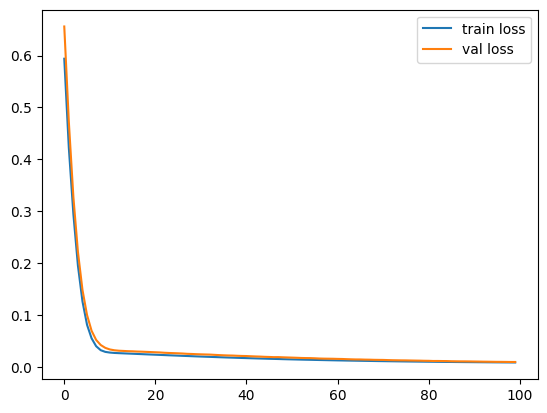

In [37]:
plt.plot(history.history['loss'],label = ['train loss'])
plt.plot(history.history['val_loss'], label = ['val loss'])
plt.legend()
plt.show()

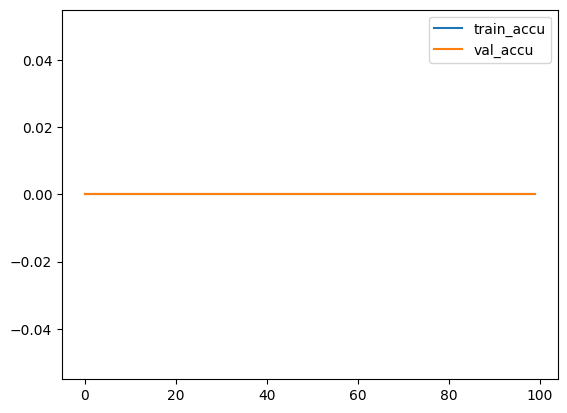

In [38]:
plt.plot(history.history['Accuracy'], label = ['train_accu'])
plt.plot(history.history['val_Accuracy'], label = 'val_accu')
plt.legend()
plt.show()